In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.18.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X=np.array([-7,-4,-1,2,5,8,11,14])
y=np.array([3,6,9,13,15,18,21,24])

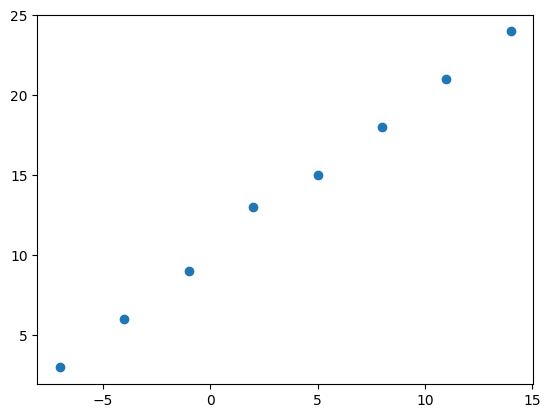

In [9]:
plt.scatter(x,y)

In [10]:
y== X+10

array([ True,  True,  True, False,  True,  True,  True,  True])

In [12]:
X.shape

(8,)

In [16]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [17]:
house_info

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>

In [18]:
house_price

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>

In [19]:
X[0].shape

()

In [23]:
for vec in X:
    print(vec.shape)

()
()
()
()
()
()
()
()


In [34]:
X=tf.constant(X)
y=tf.constant(y)

In [25]:
for vec in X:
    print(vec.shape)

()
()
()
()
()
()
()
()


In [28]:
X[0].shape

TensorShape([])

In [32]:
tf.random.set_seed(42)

In [43]:
#Create a model using the sequential API
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step - loss: 18.1315 - mae: 18.1315
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 17.8502 - mae: 17.8502
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 17.5690 - mae: 17.5690
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 17.2877 - mae: 17.2877
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 17.0065 - mae: 17.0065


In [44]:
model.predict([17.0])

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [6]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data=data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
geo_encoder=onehot_encoder.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [18]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [14]:
onehot_encoder.get_feature_names_out(['Geography'])


array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [19]:
geo_encoder_df=pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder.get_feature_names_out(['Geography']))
geo_encoder_df


,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [21]:
data= pd.concat([data.drop(["Geography"], axis=1),geo_encoder_df], axis=1)

In [22]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [23]:
with open('label_encoder_gender.pk1', 'wb') as file:
    pickle.dump(label_encoder_gender,file)
with open('onehot_encoder.pk1', 'wb') as file:
     pickle.dump(onehot_encoder,file)   

In [24]:
X=data.drop(['Exited'], axis=1)
y=data['Exited']

In [25]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
scalar= StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [32]:
with open('scalar.pk1', 'wb') as file:
    pickle.dump(scalar,file)

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime
import pickle

In [56]:
#Create a model using the sequential API
Model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

AttributeError: 'list' object has no attribute 'compile'

In [35]:
X.shape

(10000, 12)

In [67]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.BinaryCrossentropy()

In [70]:
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [74]:
log_dir='logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [75]:
tensorflow_callback=TensorBoard(log_dir=log_dir, histogram_freq=1)

In [79]:
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [80]:
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8578 - loss: 0.3367 - val_accuracy: 0.8550 - val_loss: 0.3459
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8633 - loss: 0.3330 - val_accuracy: 0.8520 - val_loss: 0.3555
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8649 - loss: 0.3225 - val_accuracy: 0.8580 - val_loss: 0.3442
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8691 - loss: 0.3294 - val_accuracy: 0.8560 - val_loss: 0.3548
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8652 - loss: 0.3250 - val_accuracy: 0.8560 - val_loss: 0.3570
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8732 - loss: 0.3116 - val_accuracy: 0.8585 - val_loss: 0.3415
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8697 - loss: 0.3080 - val_accuracy: 0.8570 - val_loss: 0.3501
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8686 - loss: 0.3222 - val_accu

In [81]:
model.save('model.h5')

In [82]:
%load_ext tensorboard

In [84]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 20128), started 0:03:06 ago. (Use '!kill 20128' to kill it.)

In [91]:
model=load_model('model.h5')
with open('onehot_encoder.pk1', 'rb') as file:
    onehot_encoder=pickle.load(file)

with open('label_encoder_gender.pk1', 'rb') as file:
    label_encoder_gender=pickle.load(file)

with open('scalar.pk1', 'rb') as file:
    scalar=pickle.load(file)

In [92]:
# Example input data
input_data = {
    'CreditScore': 600,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000
}

In [95]:
geo_encoded =onehot_encoder.transform([[input_data['Geography']]]).toarray()
geo_encoder_df=pd.DataFrame(geo_encoded, columns=onehot_encoder.get_feature_names_out(['Geography']))
geo_encoder_df


C:\Users\olug1\PycharmProjects\my_ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0


In [97]:
input_df=pd.DataFrame([input_data])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000


In [100]:
## concatination one hot encoded 
input_df=pd.concat([input_df.drop("Geography",axis=1),geo_encoder_df],axis=1)
input_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,600,1,40,3,60000,2,1,1,50000,1.0,0.0,0.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,1,40,3,60000,2,1,1,50000


In [103]:
## Scaling the input data
input_scaled=scalar.transform(input_df)
input_scaled

array([[-0.53598516,  0.91324755,  0.10479359, -0.69539349, -0.25781119,
         0.80843615,  0.64920267,  0.97481699, -0.87683221,  1.00150113,
        -0.57946723, -0.57638802]])

In [104]:
## PRedict churn
prediction=model.predict(input_scaled)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


array([[0.0710249]], dtype=float32)

In [105]:
prediction_proba = prediction[0][0]

In [106]:
prediction_proba

np.float32(0.0710249)

In [107]:
if prediction_proba > 0.5:
    print('The customer is likely to churn.')
else:
    print('The customer is not likely to churn.')

The customer is not likely to churn.
